In [ ]:
#IMPORTANTO O PANDAS E AS LIBS NECESSARIAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator
warnings.filterwarnings("ignore")


In [ ]:
#CONFIGURANDO A QUANTIDADE DE CASA DECIMAIS DENTRO DO FLOAT
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
#IMPORTANDO DF JÁ TRATADO
df_prod = pd.read_csv('/content/drive/MyDrive/Tech Challenge 1 modulo - FIAP/Dados Tratados/v2_prod_vinhos.csv',sep=',')

In [ ]:
df_prod

,id,categoria,tipo,quantidade(l)_1970,quantidade(l)_1971,quantidade(l)_1972,quantidade(l)_1973,quantidade(l)_1974,quantidade(l)_1975,quantidade(l)_1976,...,quantidade(l)_2010,quantidade(l)_2011,quantidade(l)_2012,quantidade(l)_2013,quantidade(l)_2014,quantidade(l)_2015,quantidade(l)_2016,quantidade(l)_2017,quantidade(l)_2018,quantidade(l)_2019
0,0,vinho de mesa,tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,...,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115
1,0,vinho de mesa,branco,748400,1160500,1812367,243900,4138768,1441507,1871473,...,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828
2,0,vinho de mesa,rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,...,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794
3,1,vinho fino mesa,tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,...,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377
4,1,vinho fino mesa,branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,...,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055
5,1,vinho fino mesa,rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,...,391280,754305,525903,719723,1200514,841120,590713,1167258,1291709,2032990
6,2,derivados,vinho leve,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8000,0
7,2,derivados,vinho licoroso,0,0,0,0,0,0,0,...,15000,0,0,100,36000,56000,24200,110820,124303,99485


In [ ]:
#PEGANDO SOMENTE OS ULTIMOS 15 ANOS DE PRODUÇÃO DE VINHO
df_15_vinho =  df_prod.iloc[:, [2] + list(range(-15, 0))]
df_15_vinho.head(10)

,tipo,quantidade(l)_2005,quantidade(l)_2006,quantidade(l)_2007,quantidade(l)_2008,quantidade(l)_2009,quantidade(l)_2010,quantidade(l)_2011,quantidade(l)_2012,quantidade(l)_2013,quantidade(l)_2014,quantidade(l)_2015,quantidade(l)_2016,quantidade(l)_2017,quantidade(l)_2018,quantidade(l)_2019
0,tinto,180698666,149552555,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115
1,branco,39212146,31738390,42118552,42942053,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828
2,rosado,6169620,3809942,5013136,3506830,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794
3,tinto,25409805,18868108,24786071,27583032,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377
4,branco,20012363,13249969,17598428,18812571,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055
5,rosado,31730,50900,791985,938898,324550,391280,754305,525903,719723,1200514,841120,590713,1167258,1291709,2032990
6,vinho leve,16500,0,0,0,0,0,0,0,0,0,0,0,0,8000,0
7,vinho licoroso,125700,28500,27926,65650,0,15000,0,0,100,36000,56000,24200,110820,124303,99485


In [ ]:
#UTILIZANDO MELT PARA TRANSFORMAR O DATAFRAME EM FORMATO LONGO
df_prod_total_years = pd.melt(df_15_vinho, id_vars=['tipo'], var_name='Ano', value_name='Quantidade')
df_prod_total_years

,tipo,Ano,Quantidade
0,tinto,quantidade(l)_2005,180698666
1,branco,quantidade(l)_2005,39212146
2,rosado,quantidade(l)_2005,6169620
3,tinto,quantidade(l)_2005,25409805
4,branco,quantidade(l)_2005,20012363
...,...,...,...
115,tinto,quantidade(l)_2019,17389377
116,branco,quantidade(l)_2019,18193055
117,rosado,quantidade(l)_2019,2032990
118,vinho leve,quantidade(l)_2019,0


In [ ]:
#AGRUPANDO O DATAFRAME POR ANO E SOMANDO QUANTIDADE
df_quantidade_max = df_prod_total_years.groupby(['Ano']).agg({'Quantidade':'sum'})
#EXIBINDO O RESULTADO
df_quantidade_max.index

Index(['quantidade(l)_2005', 'quantidade(l)_2006', 'quantidade(l)_2007',
       'quantidade(l)_2008', 'quantidade(l)_2009', 'quantidade(l)_2010',
       'quantidade(l)_2011', 'quantidade(l)_2012', 'quantidade(l)_2013',
       'quantidade(l)_2014', 'quantidade(l)_2015', 'quantidade(l)_2016',
       'quantidade(l)_2017', 'quantidade(l)_2018', 'quantidade(l)_2019'],
      dtype='object', name='Ano')

In [ ]:
#CALCULANDO A ESTATISTICA DESCRITIVA PARA OS VINHOS PRODUZIDOS NOS ULTIMOS 15 ANOS
df_quantidade_max.describe()

,Quantidade
count,15.00
mean,249313998.67
std,57366027.82
min,104413841.00
25%,227381065.00
50%,247513542.00
75%,285670203.50
max,334906962.00


In [ ]:
#CALCULANDO INTERVALO INTERQUARTIL PARA OS VINHOS PRODUZIDOS NOS ULTIMOS 15 ANOS
# Q1 = df_quantidade_max['Quantidade'].quantile(.25)
# Q3 = df_quantidade_max['Quantidade'].quantile(.75)
# IIQ = Q3 - Q1
# limite_inferior = Q1 - 1.5 * IIQ
# limite_superior = Q3 + 1.5 * IIQ
Q1 = df_quantidade_max['Quantidade'].quantile(0.25)
Q3 = df_quantidade_max['Quantidade'].quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


In [ ]:
limite_superior = Q3 + 1.5 * IIQ
limite_superior

373103911.25

In [ ]:
#APLICANDO A FILTRAGEM NECESSARIA PARA PLOTAR O BOXPLOT
selecao = (df_quantidade_max['Quantidade'] < limite_superior)
vv1 = df_quantidade_max[selecao]
vv1

,Quantidade
Ano,
quantidade(l)_2005,271676530
quantidade(l)_2006,217298364
quantidade(l)_2007,318492318
quantidade(l)_2008,334906962
quantidade(l)_2009,245318774
quantidade(l)_2010,220088693
quantidade(l)_2011,305439220
quantidade(l)_2012,257977767
quantidade(l)_2013,242686852


Text(0, 10, '104M')

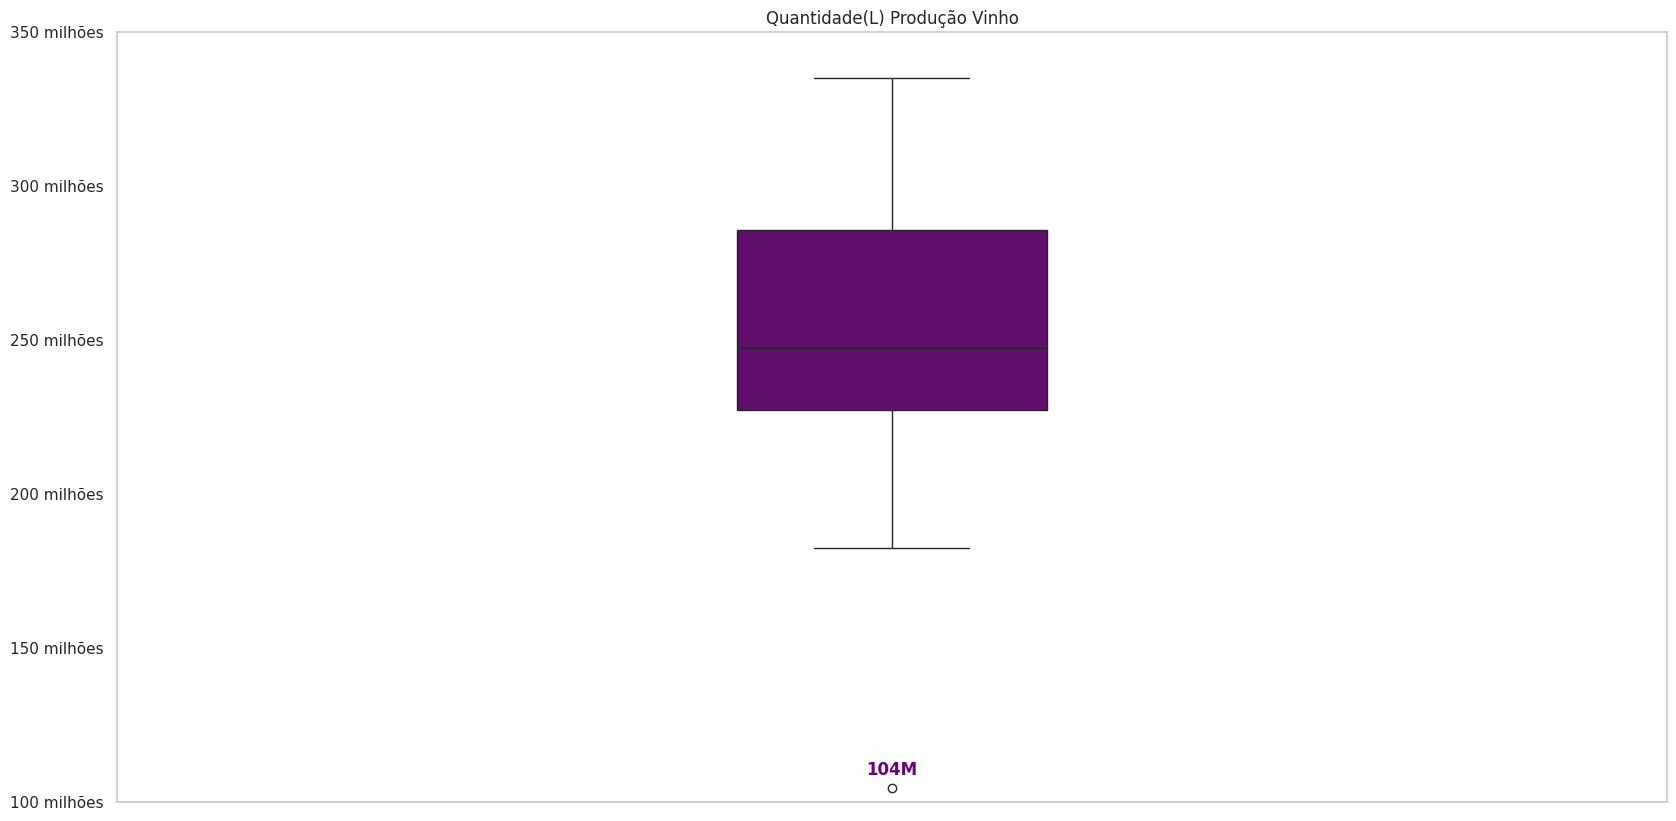

In [ ]:
#ANALISANDO E CONFIGURANDO GRAFICOS COM O SEABORN
sns.set(style="whitegrid")
custom_palette = sns.color_palette(["#6B007B"])
plt.figure(figsize=(20, 10))
ax = sns.boxplot(y=vv1['Quantidade'], showfliers=True, width=0.2, palette=custom_palette)
plt.ylim(100000000, 350000000)
ax.set_yticklabels([])
plt.title('Quantidade(L) Produção Vinho')
plt.ylabel('')
ax.grid(False)
plt.yticks([y for y in ax.get_yticks()], [f'{int(y/1e6)} milhões' for y in ax.get_yticks()])
outlier_2016 = vv1.loc[vv1['Quantidade'] == 104413841]
plt.annotate(f'{int(outlier_2016["Quantidade"].values[0]/1e6)}M', (0, outlier_2016["Quantidade"].values[0]),
             textcoords="offset points", xytext=(0, 10), ha='center', color='#6B007B', fontsize=12, fontweight='bold')

In [ ]:
#TRATANDO DF PARA CONSTRUIR GRAFICO DE LINHAS
df_qtd_line = df_quantidade_max.copy()
df_qtd_line.index = df_qtd_line.index.str.split('_').str[-1]
df_qtd_line.index = pd.to_datetime(df_qtd_line.index, format='%Y')
df_qtd_line.reset_index(inplace=True)
df_qtd_line.head(15)

,Ano,Quantidade
0,2005-01-01,271676530
1,2006-01-01,217298364
2,2007-01-01,318492318
3,2008-01-01,334906962
4,2009-01-01,245318774
5,2010-01-01,220088693
6,2011-01-01,305439220
7,2012-01-01,257977767
8,2013-01-01,242686852
9,2014-01-01,234673437


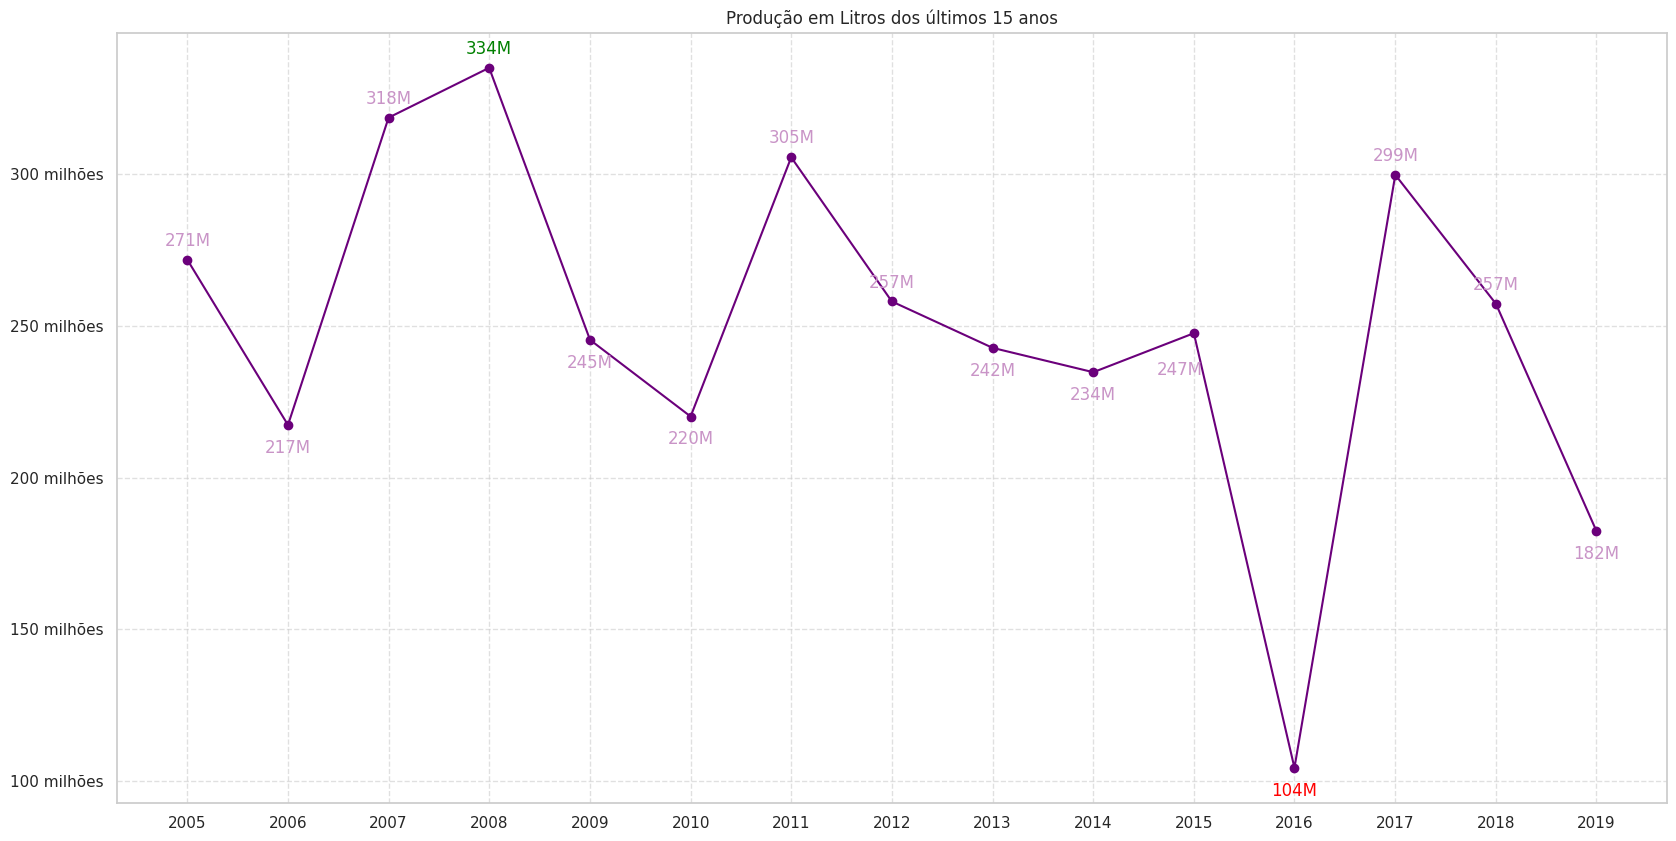

In [ ]:
#EXPLORANDO DADOS COM GRAFICOS DE LINHA
plt.rc('figure',figsize=(20,10))
linhas = plt.plot(df_qtd_line['Ano'], df_qtd_line['Quantidade'], marker='o', linestyle='-', color='#6B007B')
ax = plt.gca()
ax.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.set_major_locator(mdates.YearLocator())
def formatar_milhoes(x, pos):
    return f'{int(x/1e6)} milhões'
ax.yaxis.set_major_formatter(FuncFormatter(formatar_milhoes))
plt.title('Produção em Litros dos últimos 15 anos')
for i, valor in enumerate(df_qtd_line['Quantidade']):
    offset = 10 if valor > df_qtd_line['Quantidade'].mean() else -20
    cor = 'Green' if df_qtd_line['Ano'].dt.year.iloc[i] == 2008 else ('Red' if df_qtd_line['Ano'].dt.year.iloc[i] == [2016] else '#c994c7')
    if df_qtd_line['Ano'].dt.year.iloc[i] == 2015:
        offset = 30 if valor > df_qtd_line['Quantidade'].mean() else -30
        plt.annotate(f'{int(valor/1e6)}M', (df_qtd_line['Ano'].iloc[i], valor), textcoords="offset points", xytext=(-10, offset), ha='center',color=cor)
    else:
        plt.annotate(f'{int(valor/1e6)}M', (df_qtd_line['Ano'].iloc[i], valor), textcoords="offset points", xytext=(0, offset), ha='center',color=cor)
ax.grid(True, linestyle='--', alpha=0.6)



In [ ]:
df_qtd_line.head(15)

,Ano,Quantidade
0,2005-01-01,271676530
1,2006-01-01,217298364
2,2007-01-01,318492318
3,2008-01-01,334906962
4,2009-01-01,245318774
5,2010-01-01,220088693
6,2011-01-01,305439220
7,2012-01-01,257977767
8,2013-01-01,242686852
9,2014-01-01,234673437


In [ ]:
df_qtd_line.describe()

,Quantidade
count,15.00
mean,249313998.67
std,57366027.82
min,104413841.00
25%,227381065.00
50%,247513542.00
75%,285670203.50
max,334906962.00


##CONSTRUINDO BOXPLOT DO DataFrame Exportação

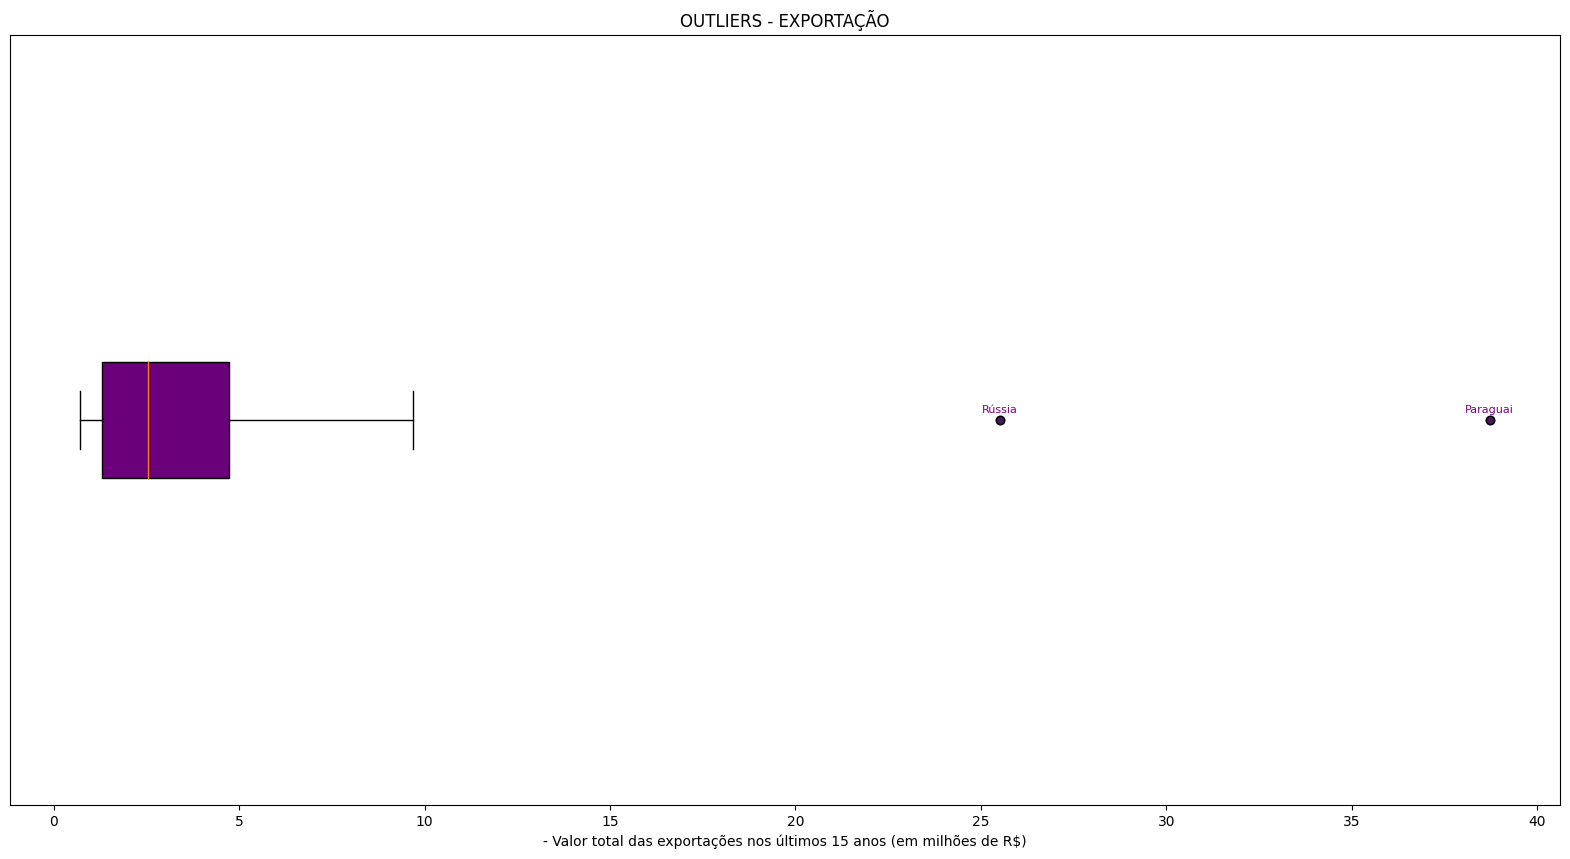

In [6]:
#CRiANDO DataFrame PARA FACILITAR A VISUALIZAÇÃO
dados = {
    'Paises': ['Paraguai', 'Rússia', 'Estados Unidos', 'China', 'Reino Unido', 'Espanha',
               'Países Baixos', 'Alemanha', 'Japão', 'Haiti', 'Bélgica', 'Uruguai',
               'Canadá', 'Suíça', 'França'],
    'Valor': [38719031, 25504484, 9684567, 4746525, 4711464, 3808552, 3791611,
              2546394, 2377716, 2327208, 1395226, 1219878, 1097417, 906264, 720359]
}

df = pd.DataFrame(dados)

#CONVETERENDO VALORES PARA MILHÕES PARA FACILITAR A VISUALIZAÇÃO
df['Valor Milhoes'] = df['Valor'] / 1000000

#CALCULO INTERQUARTÍLICO PARA CONSTRUÇÃO DO BOXPLOT
q1 = df['Valor Milhoes'].quantile(0.25)
q3 = df['Valor Milhoes'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['Valor Milhoes'] < q1 - 1.5 * iqr) | (df['Valor Milhoes'] > q3 + 1.5 * iqr)]

#CRIANDO E CONFIGURANDO BOXPLOT
plt.figure(figsize=(20, 10))
box = plt.boxplot(df['Valor Milhoes'], vert=False, patch_artist=True)
plt.scatter(outliers['Valor Milhoes'], [1] * len(outliers), marker='o', color='#461C58')

for i, row in outliers.iterrows():
    plt.annotate(row['Paises'], (row['Valor Milhoes'], 1), textcoords="offset points", xytext=(0, 5), ha='center',
                 fontsize=8, color='purple')
for patch in box['boxes']:
    patch.set_facecolor('#6B007B')
plt.title('OUTLIERS - EXPORTAÇÃO')
plt.xlabel('- Valor total das exportações nos últimos 15 anos (em milhões de R$)')
plt.yticks([])
plt.grid(False)
plt.show()